## Mask Dection Neural Network 

**The goal is to build a CNN that can read in any facial image and predict whether or not the person is wearing a mask. All of the training data was acquired from Kaggle**

In [1]:
pip install kaggle


     ---------------------------------------- 77.9/77.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.15-py3-none-any.whl size=99605 sha256=547fb9a0b8eb1b06f5f58a36c9da4576f12e786c645c732cbc73ecd223a7e102
  Stored in directory: c:\users\karuna\appdata\local\pip\cache\wheels\2c\c2\6e\15b89ec0bbf983ac0ebbdf831640411513f19709817e40514f
Successfully built kaggle


In [21]:
pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
from ipywidgets import FileUpload
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

In [65]:
uploaded_files = upload.value  # Get the uploaded files
file_contents = uploaded_files['kaggle.json']  # Access the file contents

In [66]:
import shutil
import os

# Create the directory if it doesn't exist
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Copy the file
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/'))

# Set the file permissions
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

In [67]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [68]:
from zipfile import ZipFile
dataset = '/Users/Karuna/Desktop/ML Projects/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


In [17]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 6615-E1E1

 Directory of C:\Users\Karuna\Desktop\ML Projects

2023-07-08  10:57 PM    <DIR>          .
2023-07-08  10:57 PM    <DIR>          ..
2023-07-08  10:23 PM    <DIR>          .ipynb_checkpoints
2023-07-08  10:23 PM            36,848 Credit_Card_Fraud_Detector.ipynb
2023-07-08  10:27 PM    <DIR>          data
2020-07-31  06:35 PM       171,127,690 face-mask-dataset.zip
2023-07-08  10:41 PM                62 kaggle.json
2023-07-08  10:57 PM             8,996 Mask_Detection_CNN.ipynb
2023-07-08  10:23 PM           179,022 MNIST Handwritten Digits Classifier.ipynb
               5 File(s)    171,352,618 bytes
               4 Dir(s)  57,845,092,352 bytes free


In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [24]:
def cv2_imshow(image):
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [26]:
#Importing Datasets 
withMask = os.listdir('/Users/Karuna/Desktop/ML Projects/data/with_mask')
withoutMask = os.listdir('/Users/Karuna/Desktop/ML Projects/data/without_mask')

# Checking to see number of images in each directory 
print('Number of with mask images:', len(withMask))
print('Number of without mask images:', len(withoutMask))

Number of with mask images: 3725
Number of without mask images: 3828


In [32]:
# Data preprocessing 

# create the labels
withMaskLabels = [1]*len(withMask) 
withoutMaskLabels = [0]*len(withoutMask)
imgLabels = withMaskLabels + withoutMaskLabels 


# convert images to numpy arrays+

withMaskPath = '/Users/Karuna/Desktop/ML Projects/data/with_mask/'

imgData = []

for img_file in withMask:
    image = Image.open(withMaskPath + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    imgData.append(image)



withoutMaskPath = '/Users/Karuna/Desktop/ML Projects/data/without_mask/'


for img_file in withoutMask:
    image = Image.open(withoutMaskPath + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    imgData.append(image)


    
X = np.array(imgData)
Y = np.array(imgLabels)

In [34]:
# Train/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
# Normalizing 
# Maximal pixel value is 255, so we divide by 255 to normalize 
X_train= X_train/255
X_test= X_test/255

   ## Building a CNN

In [36]:
import tensorflow as tf
from tensorflow import keras

# I have 2 classes with & without mask
numClasses = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(numClasses, activation='sigmoid'))

In [37]:
# Training the network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [38]:
# Training the network 
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 308s 2s/step - loss: 0.4601 - accuracy: 0.8150 - val_loss: 0.2624 - val_accuracy: 0.8826
Epoch 2/5
170/170 [==============================] - 276s 2s/step - loss: 0.2778 - accuracy: 0.8902 - val_loss: 0.2966 - val_accuracy: 0.8893
Epoch 3/5
170/170 [==============================] - 262s 2s/step - loss: 0.2242 - accuracy: 0.9163 - val_loss: 0.2110 - val_accuracy: 0.9174
Epoch 4/5
170/170 [==============================] - 264s 2s/step - loss: 0.1821 - accuracy: 0.9237 - val_loss: 0.2310 - val_accuracy: 0.9190
Epoch 5/5
170/170 [==============================] - 264s 2s/step - loss: 0.1794 - accuracy: 0.9321 - val_loss: 0.2685 - val_accuracy: 0.8942


In [40]:
loss, accuacy = model.evaluate(X_test, Y_test)
print('Test Accuracy :', accuacy)

48/48 [==============================] - 32s 658ms/step - loss: 0.2602 - accuracy: 0.8974
Test Accuracy : 0.8974189162254333


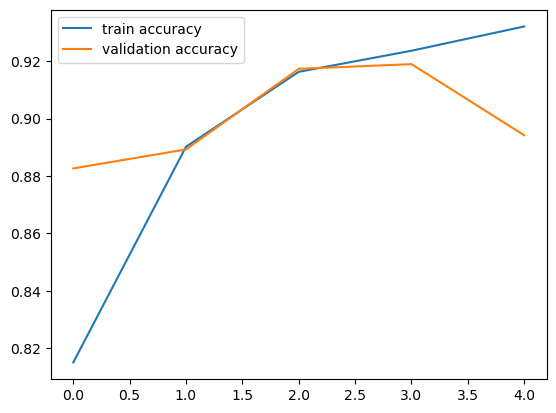

In [41]:
# plot the accuracy value
h=history
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

## **Predictive System**

In [62]:
# Creating a function that will read in any image and predict whether or not the person in the image is wearing a mask 

def MaskorNoMask(path):
    # Reading in image
    inputImage = cv2.imread(path)
    cv2_imshow(inputImage)
    
    # Preprocessing the image 
    inputImageResized = cv2.resize(inputImage, (128,128))
    inputImageResized = inputImageResized/255
    inputImageReshape = np.reshape(inputImageResized, [1,128,128,3])
    
    # Using CNN model to make a prediction
    Prediction = model.predict(inputImageReshape)
    print('My predictions are: ', Prediction)


    PredictionLabel = np.argmax(Prediction)

    if PredictionLabel == 1:
        print('The person in the image is wearing a mask')
    if PredictionLabel == 0:
        print('The person in the image is not wearing a mask')
    return 

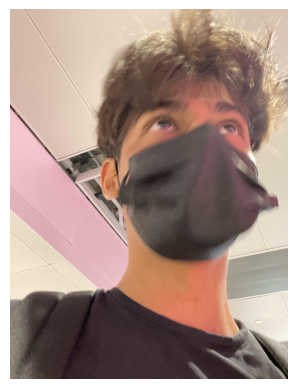

1/1 [==============================] - 0s 71ms/step
My predictions are:  [[0.16738911 0.88864577]]
The person in the image is wearing a mask


In [69]:
pathMask = '/Users/Karuna/Desktop/ML Projects/data/test/mit_mask.jpg'
MitMask = MaskorNoMask(pathMask)